In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs1 already exists.
Error occurred while processing: outputs1.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs2 already exists.
Error occurred while processing: outputs2.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Write the Training Loop

118it [00:27,  4.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


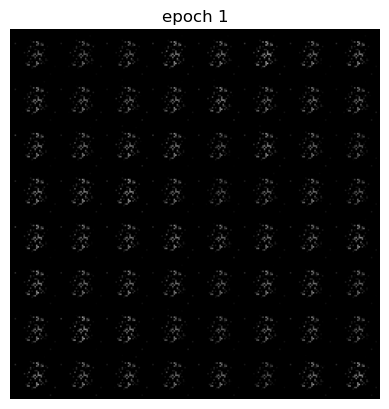

Epoch 1 of 100
Generator loss: 1.43877292, Discriminator loss: 0.88338196


118it [00:29,  3.94it/s]                         


Epoch 2 of 100
Generator loss: 3.12513781, Discriminator loss: 1.33361077


118it [00:31,  3.79it/s]                         


Epoch 3 of 100
Generator loss: 3.33878660, Discriminator loss: 0.85886234


118it [00:29,  4.02it/s]                         


Epoch 4 of 100
Generator loss: 3.89448524, Discriminator loss: 0.79369450


118it [00:31,  3.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


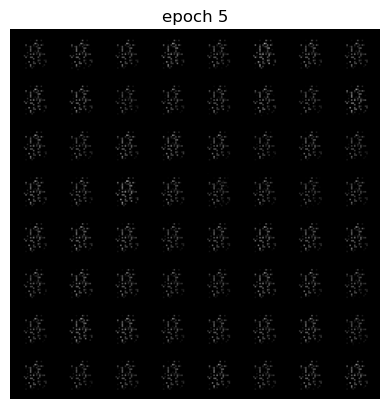

Epoch 5 of 100
Generator loss: 2.36341286, Discriminator loss: 0.81654149


118it [00:30,  3.92it/s]                         


Epoch 6 of 100
Generator loss: 2.56785202, Discriminator loss: 1.22571433


118it [00:31,  3.75it/s]                         


Epoch 7 of 100
Generator loss: 1.29612184, Discriminator loss: 1.17487001


118it [00:30,  3.82it/s]                         


Epoch 8 of 100
Generator loss: 1.96865940, Discriminator loss: 0.82552642


118it [00:31,  3.77it/s]                         


Epoch 9 of 100
Generator loss: 1.76631582, Discriminator loss: 0.93087363


118it [00:30,  3.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


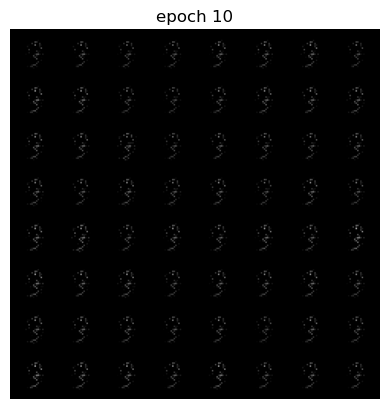

Epoch 10 of 100
Generator loss: 1.42164588, Discriminator loss: 1.04891121


118it [00:31,  3.78it/s]                         


Epoch 11 of 100
Generator loss: 2.12481022, Discriminator loss: 0.91586220


118it [00:31,  3.74it/s]                         


Epoch 12 of 100
Generator loss: 2.46749330, Discriminator loss: 0.78084975


118it [00:32,  3.64it/s]                         


Epoch 13 of 100
Generator loss: 2.42760801, Discriminator loss: 0.71928364


118it [00:30,  3.90it/s]                         


Epoch 14 of 100
Generator loss: 2.55119300, Discriminator loss: 0.77382022


118it [00:30,  3.86it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


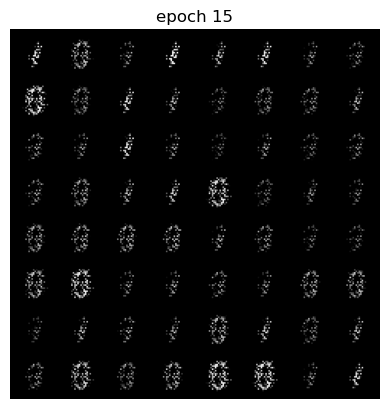

Epoch 15 of 100
Generator loss: 2.64072537, Discriminator loss: 0.76093340


118it [00:29,  3.93it/s]                         


Epoch 16 of 100
Generator loss: 2.79047012, Discriminator loss: 0.66154563


118it [00:27,  4.22it/s]                         


Epoch 17 of 100
Generator loss: 2.42522168, Discriminator loss: 0.84453356


118it [00:27,  4.30it/s]                         


Epoch 18 of 100
Generator loss: 3.00606132, Discriminator loss: 0.64462781


118it [00:27,  4.23it/s]                         


Epoch 19 of 100
Generator loss: 2.43824744, Discriminator loss: 0.71538401


118it [00:27,  4.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


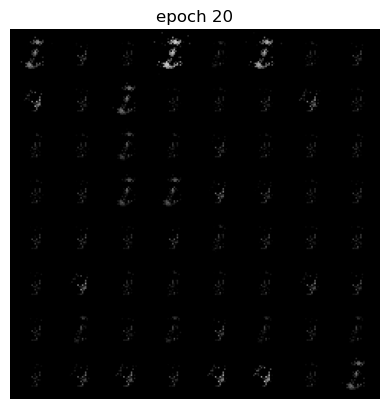

Epoch 20 of 100
Generator loss: 2.89836740, Discriminator loss: 0.46921551


118it [00:27,  4.29it/s]                         


Epoch 21 of 100
Generator loss: 2.74656844, Discriminator loss: 0.68371534


118it [00:27,  4.29it/s]                         


Epoch 22 of 100
Generator loss: 1.96326733, Discriminator loss: 0.87988043


118it [00:28,  4.14it/s]                         


Epoch 23 of 100
Generator loss: 1.93689275, Discriminator loss: 0.66910297


118it [00:28,  4.12it/s]                         


Epoch 24 of 100
Generator loss: 2.06282544, Discriminator loss: 0.68548459


118it [00:30,  3.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


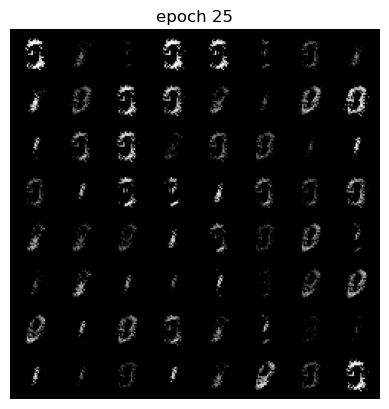

Epoch 25 of 100
Generator loss: 1.85593450, Discriminator loss: 0.78385109


118it [00:30,  3.85it/s]                         


Epoch 26 of 100
Generator loss: 1.88585365, Discriminator loss: 0.75915921


118it [00:32,  3.66it/s]                         


Epoch 27 of 100
Generator loss: 2.41926908, Discriminator loss: 0.59162492


118it [00:29,  4.03it/s]                         


Epoch 28 of 100
Generator loss: 2.35806727, Discriminator loss: 0.65853703


118it [00:27,  4.34it/s]                         


Epoch 29 of 100
Generator loss: 2.27592206, Discriminator loss: 0.54470605


118it [00:26,  4.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


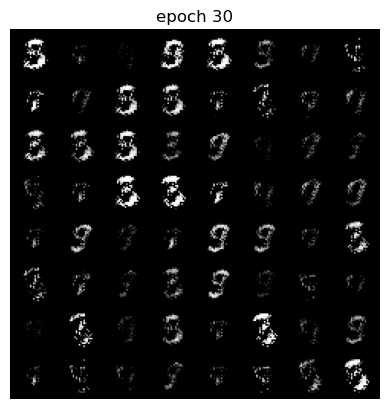

Epoch 30 of 100
Generator loss: 2.76271486, Discriminator loss: 0.52349174


118it [00:26,  4.38it/s]                         


Epoch 31 of 100
Generator loss: 2.73949432, Discriminator loss: 0.63918853


118it [00:30,  3.82it/s]                         


Epoch 32 of 100
Generator loss: 2.61276174, Discriminator loss: 0.48542482


118it [00:28,  4.10it/s]                         


Epoch 33 of 100
Generator loss: 2.88641071, Discriminator loss: 0.47218448


118it [00:26,  4.42it/s]                         


Epoch 34 of 100
Generator loss: 2.86992049, Discriminator loss: 0.63450432


118it [00:26,  4.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


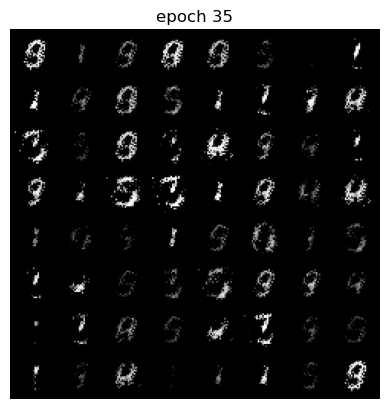

Epoch 35 of 100
Generator loss: 2.53199625, Discriminator loss: 0.54468936


118it [00:28,  4.11it/s]                         


Epoch 36 of 100
Generator loss: 2.77867365, Discriminator loss: 0.50388771


118it [00:29,  3.95it/s]                         


Epoch 37 of 100
Generator loss: 2.65172076, Discriminator loss: 0.57859612


118it [00:27,  4.31it/s]                         


Epoch 38 of 100
Generator loss: 2.89641190, Discriminator loss: 0.51756823


118it [00:27,  4.34it/s]                         


Epoch 39 of 100
Generator loss: 2.61514854, Discriminator loss: 0.58779585


118it [00:27,  4.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


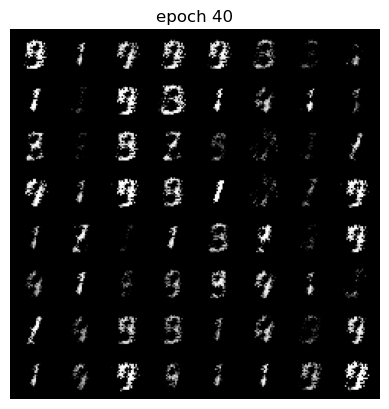

Epoch 40 of 100
Generator loss: 2.34690642, Discriminator loss: 0.64770538


118it [00:27,  4.35it/s]                         


Epoch 41 of 100
Generator loss: 2.55804920, Discriminator loss: 0.60202038


118it [00:26,  4.37it/s]                         


Epoch 42 of 100
Generator loss: 2.66931725, Discriminator loss: 0.54304647


118it [00:27,  4.35it/s]                         


Epoch 43 of 100
Generator loss: 2.56082034, Discriminator loss: 0.55042374


118it [00:27,  4.37it/s]                         


Epoch 44 of 100
Generator loss: 2.57028127, Discriminator loss: 0.53065336


118it [00:27,  4.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


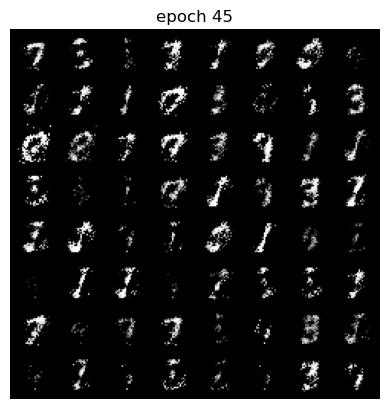

Epoch 45 of 100
Generator loss: 3.04469419, Discriminator loss: 0.48775864


118it [00:27,  4.28it/s]                         


Epoch 46 of 100
Generator loss: 2.73731756, Discriminator loss: 0.59360927


118it [00:27,  4.35it/s]                         


Epoch 47 of 100
Generator loss: 2.72199750, Discriminator loss: 0.54442650


118it [00:27,  4.35it/s]                         


Epoch 48 of 100
Generator loss: 3.04513645, Discriminator loss: 0.47284064


118it [00:27,  4.35it/s]                         


Epoch 49 of 100
Generator loss: 2.73574471, Discriminator loss: 0.58113319


118it [00:27,  4.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


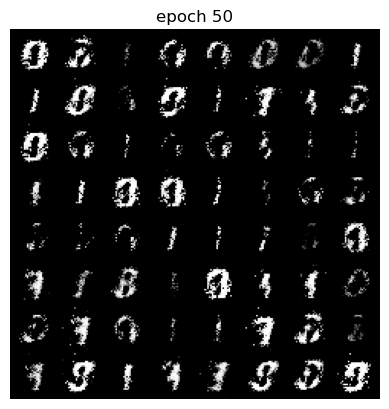

Epoch 50 of 100
Generator loss: 2.91786885, Discriminator loss: 0.56163949


118it [00:27,  4.35it/s]                         


Epoch 51 of 100
Generator loss: 3.15195060, Discriminator loss: 0.46583709


118it [00:28,  4.16it/s]                         


Epoch 52 of 100
Generator loss: 2.63337803, Discriminator loss: 0.66214210


118it [00:27,  4.27it/s]                         


Epoch 53 of 100
Generator loss: 2.59665871, Discriminator loss: 0.63262391


118it [00:27,  4.32it/s]                         


Epoch 54 of 100
Generator loss: 2.91510606, Discriminator loss: 0.53400689


118it [00:28,  4.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


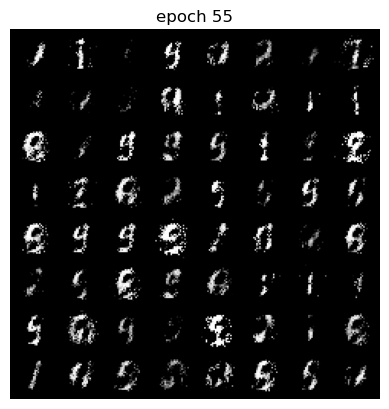

Epoch 55 of 100
Generator loss: 2.83901525, Discriminator loss: 0.56600022


118it [00:28,  4.17it/s]                         


Epoch 56 of 100
Generator loss: 2.77613306, Discriminator loss: 0.53936011


118it [00:27,  4.29it/s]                         


Epoch 57 of 100
Generator loss: 3.06979632, Discriminator loss: 0.48457026


118it [00:27,  4.33it/s]                         


Epoch 58 of 100
Generator loss: 2.71525383, Discriminator loss: 0.61868131


118it [00:27,  4.32it/s]                         


Epoch 59 of 100
Generator loss: 2.76230907, Discriminator loss: 0.57707399


118it [00:27,  4.31it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


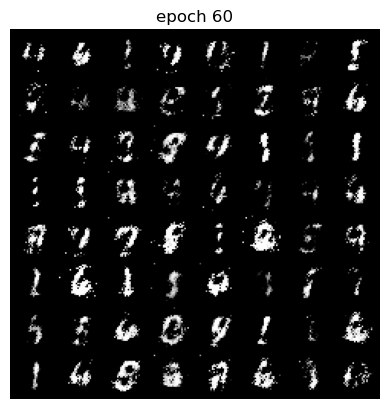

Epoch 60 of 100
Generator loss: 2.88834190, Discriminator loss: 0.53652829


118it [00:27,  4.27it/s]                         


Epoch 61 of 100
Generator loss: 2.48954654, Discriminator loss: 0.65040350


118it [00:27,  4.30it/s]                         


Epoch 62 of 100
Generator loss: 2.79595900, Discriminator loss: 0.55316043


118it [00:27,  4.31it/s]                         


Epoch 63 of 100
Generator loss: 2.79799604, Discriminator loss: 0.54174662


118it [00:27,  4.36it/s]                         


Epoch 64 of 100
Generator loss: 2.89316964, Discriminator loss: 0.53799248


118it [00:27,  4.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


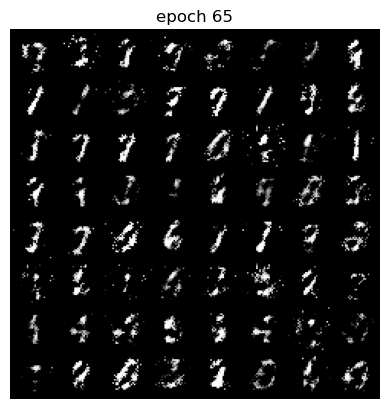

Epoch 65 of 100
Generator loss: 2.54987025, Discriminator loss: 0.60967243


118it [00:27,  4.30it/s]                         


Epoch 66 of 100
Generator loss: 2.61031938, Discriminator loss: 0.60381496


118it [00:29,  4.07it/s]                         


Epoch 67 of 100
Generator loss: 2.54725051, Discriminator loss: 0.61971426


118it [00:27,  4.33it/s]                         


Epoch 68 of 100
Generator loss: 2.52792907, Discriminator loss: 0.59008604


118it [00:27,  4.35it/s]                         


Epoch 69 of 100
Generator loss: 2.69366121, Discriminator loss: 0.57498062


118it [00:28,  4.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


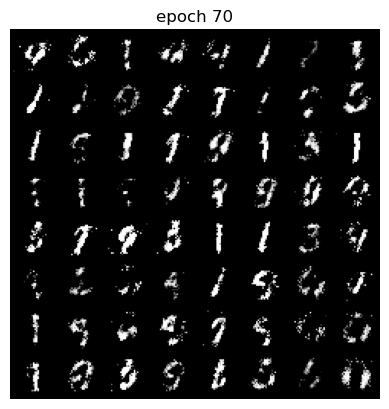

Epoch 70 of 100
Generator loss: 2.55507159, Discriminator loss: 0.62871814


118it [00:27,  4.34it/s]                         


Epoch 71 of 100
Generator loss: 2.51718664, Discriminator loss: 0.64958638


118it [00:27,  4.34it/s]                         


Epoch 72 of 100
Generator loss: 2.12979794, Discriminator loss: 0.70925045


118it [00:27,  4.33it/s]                         


Epoch 73 of 100
Generator loss: 2.35910392, Discriminator loss: 0.63898319


118it [00:27,  4.28it/s]                         


Epoch 74 of 100
Generator loss: 2.49241042, Discriminator loss: 0.63724661


118it [00:32,  3.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


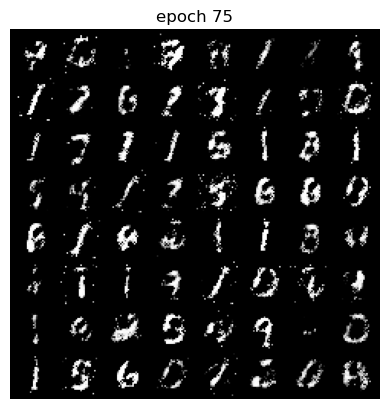

Epoch 75 of 100
Generator loss: 2.38106823, Discriminator loss: 0.66548634


118it [00:31,  3.72it/s]                         


Epoch 76 of 100
Generator loss: 2.33917904, Discriminator loss: 0.71487200


118it [00:30,  3.81it/s]                         


Epoch 77 of 100
Generator loss: 2.19514346, Discriminator loss: 0.70394200


118it [00:30,  3.86it/s]                         


Epoch 78 of 100
Generator loss: 2.19866323, Discriminator loss: 0.69442260


118it [00:29,  3.97it/s]                         


Epoch 79 of 100
Generator loss: 2.14499760, Discriminator loss: 0.69870549


118it [00:30,  3.86it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


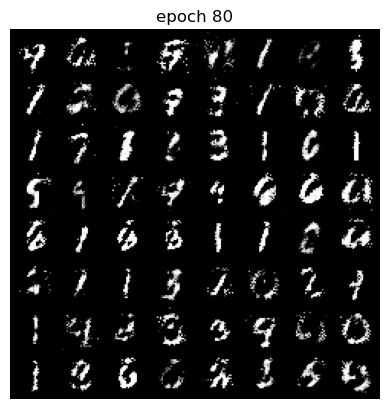

Epoch 80 of 100
Generator loss: 2.29272246, Discriminator loss: 0.68282086


118it [00:30,  3.84it/s]                         


Epoch 81 of 100
Generator loss: 2.27937531, Discriminator loss: 0.69557005


118it [00:27,  4.29it/s]                         


Epoch 82 of 100
Generator loss: 2.26093960, Discriminator loss: 0.73161453


118it [00:27,  4.31it/s]                         


Epoch 83 of 100
Generator loss: 2.21652937, Discriminator loss: 0.69368553


118it [00:27,  4.27it/s]                         


Epoch 84 of 100
Generator loss: 2.18408370, Discriminator loss: 0.67393339


118it [00:27,  4.31it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


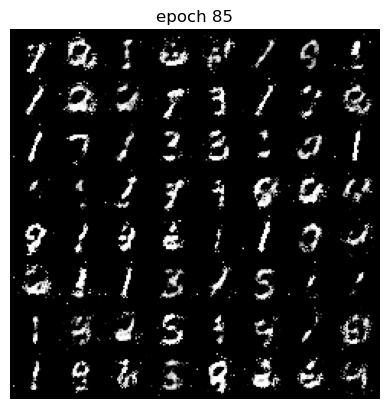

Epoch 85 of 100
Generator loss: 2.16426849, Discriminator loss: 0.72695643


118it [00:27,  4.31it/s]                         


Epoch 86 of 100
Generator loss: 2.24621654, Discriminator loss: 0.68958253


118it [00:27,  4.26it/s]                         


Epoch 87 of 100
Generator loss: 2.03096128, Discriminator loss: 0.79516971


118it [00:27,  4.28it/s]                         


Epoch 88 of 100
Generator loss: 2.15700507, Discriminator loss: 0.71812320


118it [00:27,  4.27it/s]                         


Epoch 89 of 100
Generator loss: 2.03121424, Discriminator loss: 0.75654030


118it [00:27,  4.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


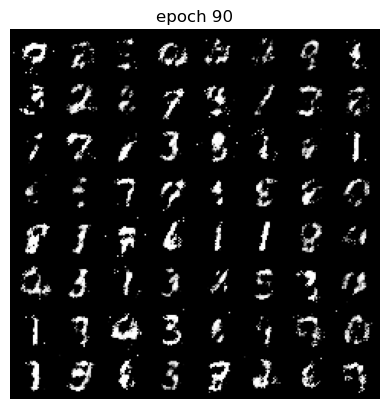

Epoch 90 of 100
Generator loss: 2.00873566, Discriminator loss: 0.76264358


118it [00:27,  4.30it/s]                         


Epoch 91 of 100
Generator loss: 1.98913252, Discriminator loss: 0.82413268


118it [00:28,  4.13it/s]                         


Epoch 92 of 100
Generator loss: 1.96027851, Discriminator loss: 0.76909035


118it [00:27,  4.25it/s]                         


Epoch 93 of 100
Generator loss: 1.95980203, Discriminator loss: 0.78186935


118it [00:27,  4.25it/s]                         


Epoch 94 of 100
Generator loss: 2.03009748, Discriminator loss: 0.78394252


118it [00:27,  4.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


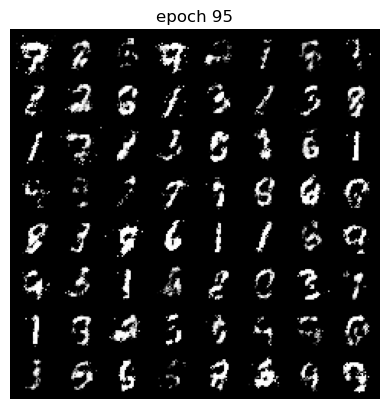

Epoch 95 of 100
Generator loss: 2.03225899, Discriminator loss: 0.75732487


118it [00:27,  4.26it/s]                         


Epoch 96 of 100
Generator loss: 1.92670000, Discriminator loss: 0.78686714


118it [00:27,  4.29it/s]                         


Epoch 97 of 100
Generator loss: 1.95192230, Discriminator loss: 0.79167533


118it [00:27,  4.27it/s]                         


Epoch 98 of 100
Generator loss: 1.94998670, Discriminator loss: 0.80354190


118it [00:27,  4.30it/s]                         


Epoch 99 of 100
Generator loss: 1.92015541, Discriminator loss: 0.80480552


118it [00:24,  4.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


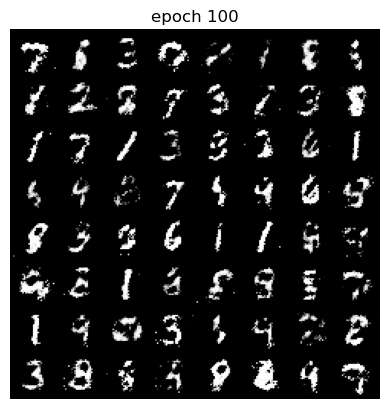

Epoch 100 of 100
Generator loss: 1.86632478, Discriminator loss: 0.83368349


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    loss = criterion(output, true_label)
    return loss
    
def discriminator_loss(output, true_label):
    loss = criterion(output, true_label)
    return loss
    
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            b_size = data_real.size(0)
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            optim_d.zero_grad()
            output_real = discriminator(data_real)
            loss_real = discriminator_loss(output_real, real_label)
            output_fake = discriminator(data_fake)
            loss_fake = discriminator_loss(output_fake, fake_label)
            loss_real.backward()
            loss_fake.backward()
            optim_d.step()
            loss_d += loss_real + loss_fake
        data_fake = generator(create_noise(b_size, nz))
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        optim_g.zero_grad()
        output = discriminator(data_fake)
        loss = generator_loss(output, real_label)
        loss.backward()
        optim_g.step()
        loss_g += loss
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or (epoch + 1) == 1:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.detach().numpy())
    losses_d.append(epoch_loss_d.detach().numpy())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

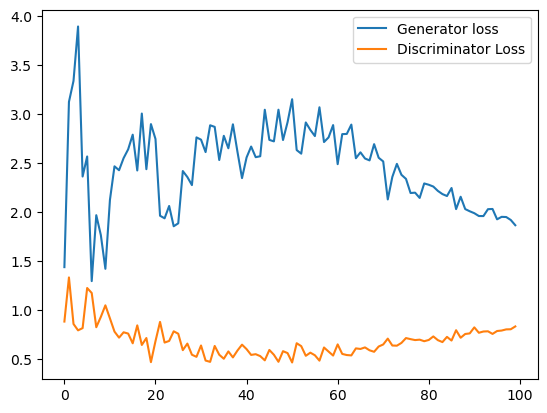

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')